In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure, filters
from PIL import Image
import skimage.color
import skimage.io
import seaborn as sns
import math

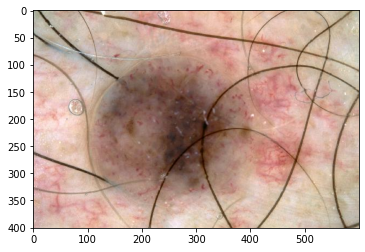

In [2]:
im = plt.imread('resized_data/example_image_resized/ISIC_0015483.jpg')
plt.imshow(im)

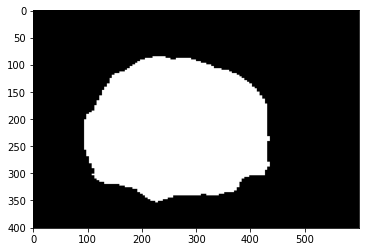

In [3]:
border=plt.imread('resized_data/example_segmentation_resized/ISIC_0015483_segmentation.png')
plt.imshow(border, cmap='gray')

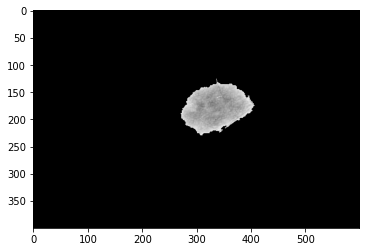

In [4]:
#adding the border to the picture

#load the images as objects with Image.open()

borderObj = Image.open('resized_data/example_segmentation_resized/ISIC_0001769_segmentation.png')
imObj = Image.open('resized_data/example_image_resized/ISIC_0001769.jpg')

borderObj.paste(imObj, (0,0), mask = borderObj) 

plt.imshow(borderObj, cmap='gray')

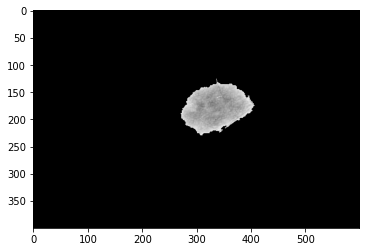

[146 135 112 ... 149 150 153]
(8513,)


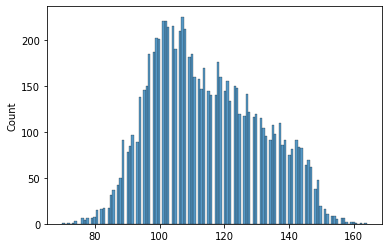

In [5]:
#greyscale histogram, Color
#image = skimage.io.imread(fname='resized_data/example_image_resized/ISIC_0015372.jpg', as_gray=True)

#show the picture
fig, ax = plt.subplots()
plt.imshow(borderObj, cmap='gray')
plt.show()


#Create the plot with 256 bins (for each range of color)
# histogram, bin_edges = np.histogram(borderObj, bins=255, range=(1, 256))
# fig = plt.figure()
# ax = fig.add_axes((0,0,1,1))
# plt.title("Grayscale Histogram")
# plt.xlabel("grayscale value")
# plt.ylabel("pixel count")
# plt.xlim([0, 256])
# sns.lineplot(bin_edges[1:], histogram, ax=ax)  # <- or here
# plt.show()
# sns.histplot(np.array(borderObj))


# or do it with the colors

#img = im.copy()
#img[border==0] = 0
#plt.imshow(img)
border_arr = np.array(borderObj)
border_arr = border_arr[border_arr != 0]
sns.histplot(border_arr, bins=128)

print(border_arr)

print(border_arr.shape)

71601.0
69364


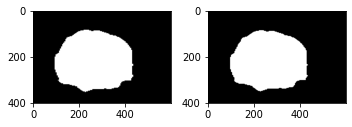

In [6]:
from skimage import morphology

struct_el = morphology.disk(2)

# Use this "brush" to erode the image - eat away at the borders

mask_eroded = morphology.binary_erosion(border, struct_el)

# Show side by side (depending on brush size, you might not see a difference visually)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(border, cmap='gray')
axes[1].imshow(mask_eroded, cmap='gray')
fig.tight_layout()

# Verify the new mask is smaller
new_area= np.sum(mask_eroded)
area = np.sum(border)

print(area)
print(new_area)

(400, 600)


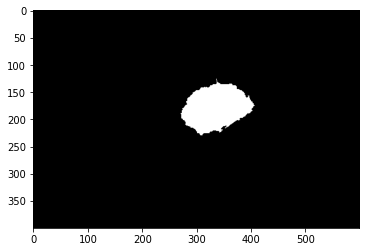

In [7]:
from skimage import transform
img = plt.imread("resized_data/example_segmentation_resized/ISIC_0001769_segmentation.png")
img_rot = transform.rotate(img, 0)
print(img.shape)
plt.imshow(img, cmap="gray");

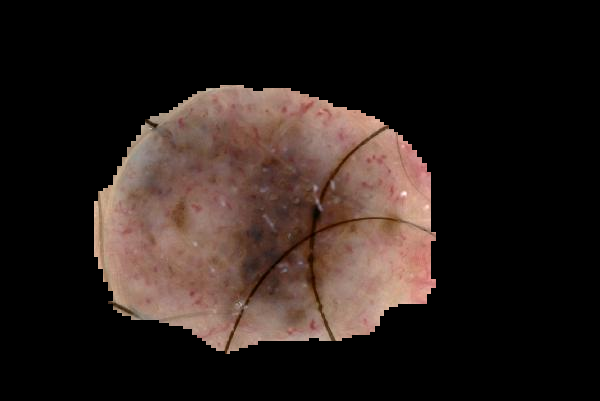

[73 46 37]


30.231670004421705

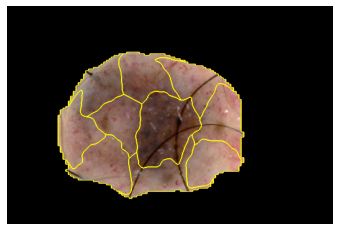

In [8]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

# border = Image.open('resized_data/example_segmentation_resized/ISIC_0015483_segmentation.png').convert("RGB")
# mask = Image.open('resized_data/example_segmentation_resized/ISIC_0015483_segmentation.png')
# img = Image.open('resized_data/example_image_resized/ISIC_0015483.jpg').convert("RGB")
# border.paste(img, mask=mask)


border = Image.open('resized_data/example_segmentation_resized/ISIC_0015483_segmentation.png').convert("RGB")
mask = Image.open('resized_data/example_segmentation_resized/ISIC_0015483_segmentation.png')
border.paste(Image.open('resized_data/example_image_resized/ISIC_0015483.jpg').convert("RGB"), mask=mask)
border.show()


som = np.array(border)
print(som[200,300,:])

segments = slic(som, n_segments = 10, sigma = 5, mask=mask)

fig = plt.figure("Superpixels -- %d segments" % (10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(som, segments))
plt.axis("off")




#plt.show()
avg_color = np.vstack([np.round(np.mean(som[segments==s], axis=0)) for s in np.unique(segments)])

avg_color
avg_color = avg_color[1:]
np.std(avg_color, axis = 0)
avg_color[np.where((avg_color != (0, 0, 0)).all(axis=1))]
np.mean(np.std(avg_color, axis=0))

In [9]:
def avg_color_dist(color_arr):
    """
    Computes the Euclidean distance between all colors in the average color array.
    takes average color array as input.
    returns average distance as float.
    """
    distances = []
    for i, color in enumerate(color_arr):
        for j in range(i+1, len(color_arr)):
            distances.append(math.dist(color_arr[i], color_arr[j]))
    return sum(distances)/len(distances) # Could also return range(min, max) if we want to use that to say something.

array([9.65068922, 9.75249256, 9.51931111])

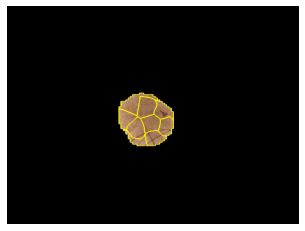

In [10]:
border2 = Image.open('resized_data/example_segmentation_resized/ISIC_0014616_segmentation.png').convert("RGB")
mask2 = Image.open('resized_data/example_segmentation_resized/ISIC_0014616_segmentation.png')
img2 = Image.open('resized_data/example_image_resized/ISIC_0014616.jpg').convert("RGB")

border2.paste(img2, mask=mask2)
#border.show()


som2 = np.array(border2)


segments2 = slic(som2, n_segments = 10, sigma = 5, mask=mask2)

fig = plt.figure("Superpixels -- %d segments" % (10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(som2, segments2))
plt.axis("off")




#plt.show()
avg_color2 = [np.round(np.mean(som2[segments2==s], axis=0)) for s in np.unique(segments2)][1:] 
avg_color2
np.std(avg_color2, axis = 0)

In [11]:
print(f"colorful : {avg_color},\nnot colorful: {avg_color2}")

colorful : [[136.  99.  87.]
 [131. 105.  93.]
 [164. 122. 109.]
 [178. 129. 113.]
 [166. 130. 115.]
 [ 86.  54.  43.]
 [130.  94.  83.]
 [155. 118. 104.]
 [138. 105.  91.]
 [185. 143. 127.]
 [ 70.  49.  34.]],
not colorful: [array([174., 131.,  95.]), array([156., 112.,  79.]), array([160., 118.,  86.]), array([183., 139., 103.]), array([159., 115.,  80.]), array([169., 127.,  93.]), array([175., 130.,  96.]), array([184., 142., 110.]), array([166., 123.,  93.])]


In [12]:
import pandas as pd
from scripts.color_features import color_features
from os import listdir
img_path = "resized_data/example_image_resized/"
seg_path = "resized_data/example_segmentation_resized/"
img_names = sorted(listdir(img_path))
seg_names = sorted(listdir(seg_path))

df = pd.DataFrame({"img": img_names, "seg": seg_names})
results = [color_features(img_path + img, seg_path + seg) for img, seg in zip(img_names, seg_names)]
df["color_dist"], df["color_sd"] = zip(*results)
df.to_csv("color_features", index=False)

### Asymmetry

In [13]:
from skimage import transform 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

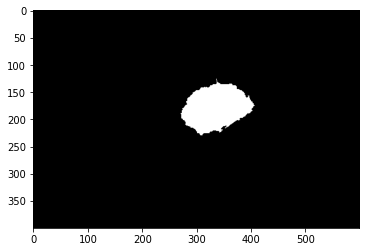

In [14]:
# We want to rotate each image such that the maximum height is vertical. 
# Check the difference between highest pixel in skin lesion and the lowest to compute height. 
# Rotate image and update max if we find a larger value. After 180 degrees, break loop and return max
height_mask=plt.imread("resized_data/example_segmentation_resized/ISIC_0001769_segmentation.png")
plt.imshow(height_mask, cmap="gray")
height_mask

In [15]:
# A way to measure height or width of the mask

def degrees_to_rotate(image):
    '''
    Input: Masked image 
    Returns which degrees an image should be rotated, in order to be able to fold it as 
    "symmestrically" as possible . Returns the degree.
    '''
    max_height = 0 
    degrees = 0
    for i in range(5, 181, 5):
        height_mask = transform.rotate(height_mask, i)
        pixels_in_col = np.sum(height_mask, axis=0)
        max_pixels_in_col = np.max(pixels_in_col)
        if max_pixels_in_col > max_height:
            max_height = max_pixels_in_col
            degrees = i 
        return i 

In [16]:
# a function that runs all masks in resized_data/example_segmentation_resized and rotates them
# and saves them in a new csv file called "example_segmentation_rotated"
# see rotate.py

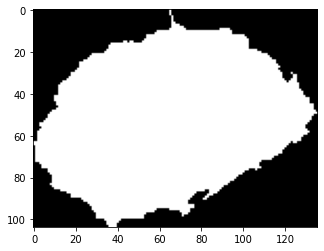

In [51]:
# A function to measure the asymmetry 

# Measure the height and width of the skin lesions masks that are rotated --> 
# done by taking max of col and rows and halving.  

white_mask = np.where(height_mask == 1)
max_x, min_x = max(white_mask[0]), min(white_mask[0])
max_y, min_y = max(white_mask[1]), min(white_mask[1])

height_mask = height_mask[min_x:max_x + 1, min_y:max_y +1]
plt.imshow(height_mask, cmap="gray")

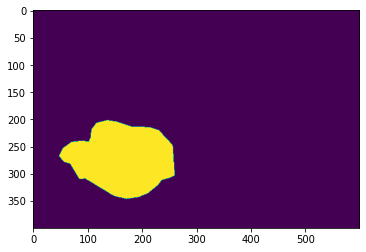

In [64]:
# padding the mask before rotating it 0007344

newmask=plt.imread("resized_data/example_segmentation_resized/ISIC_0007344_segmentation.png")
plt.imshow(newmask)




(650, 850)

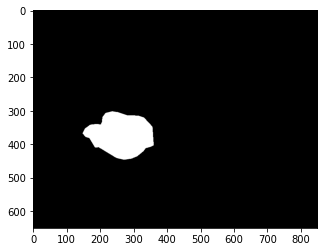

In [75]:
shape = newmask.shape
width_add, height_add = int(shape[0]*0.25), int(shape[1]*0.25)
newmask1 = np.pad(newmask, (width_add,height_add), constant_values=(0,0))
plt.imshow(newmask1, cmap='gray')
newmask1.shape

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6840a14b-d41a-45b9-abd0-892354334cb2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>